# 서포트벡터머신_실습

# Step0. 공통 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step1. 분석에 필요한 데이터 구성하기 - Scale 조정

In [3]:
ds = pd.read_csv("통신고객이탈.csv", engine = 'python')
ds['CHURN'].replace(to_replace='Active', value = 0, inplace = True)
ds['CHURN'].replace(to_replace='Churned', value = 1, inplace = True)
ds.drop('CUSTOMER_ID', axis = 1, inplace = True)
ds.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
ds_dummy = pd.get_dummies(ds)
ds_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
np.random.seed(seed= 1234)
msk = np.random.rand(ds_dummy.shape[0])<0.7
ds_train = ds_dummy[msk]
ds_test = ds_dummy[~msk]

ds_train_y = ds_train['CHURN']
ds_train_x = ds_train.drop('CHURN', axis = 1, inplace = False)
ds_test_y = ds_test['CHURN']
ds_test_x = ds_test.drop('CHURN', axis = 1, inplace = False)

print("train data X size : {}".format(ds_train_x.shape))
print("train data Y size : {}".format(ds_train_y.shape))
print("test data X size : {}".format(ds_test_x.shape))
print("test data Y size : {}".format(ds_test_y.shape))

train data X size : (635, 33)
train data Y size : (635,)
test data X size : (295, 33)
test data Y size : (295,)


In [7]:
ds_train_x_scaled = scale(ds_train_x, axis = 0)
ds_test_x_scaled = scale(ds_test_x, axis = 0)
pd.DataFrame(ds_train_x_scaled, columns= ds_train_x.columns).head()

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.061287,-0.066658,0.936779,-0.050954,-0.622843,-0.431938,-0.777862,0.069711,-0.778293,0.958347,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
1,-0.366521,-0.240702,2.073082,0.618542,-0.088273,-0.309382,-0.601091,0.247156,-0.454921,-1.043463,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
2,-0.366521,1.070294,2.357157,0.130457,-0.232062,-0.983441,-1.374462,-0.328554,-0.811538,-1.043463,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
3,1.464884,1.072417,0.084552,0.255718,-0.416436,-0.922163,-0.496134,0.310247,-0.286151,-1.043463,...,2.137797,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715
4,-0.137596,-0.139530,0.936779,0.851786,0.053197,-0.248104,0.083895,0.558670,-0.279066,0.958347,...,-0.467771,-0.097668,-0.105577,-0.365963,-0.259281,-0.132771,0.916831,-0.590081,-0.36319,-0.039715


# SVC 모델 생성

In [8]:
svm_uncustomized_scaled = SVC(random_state = 1234)
svm_uncustomized_scaled.fit(ds_train_x_scaled, ds_train_y)
print("Accuracy on training set : {:.3f}".format(svm_uncustomized_scaled.score(ds_train_x_scaled, ds_train_y)))
print("Accuracy on test set : {:.3f}".format(svm_uncustomized_scaled.score(ds_test_x_scaled, ds_test_y)))

Accuracy on training set : 0.910
Accuracy on test set : 0.905


In [9]:
train_accuracy = []
test_accuracy = []
para_C = []
for C in range(15):
    svm1_scaled = SVC(C = C+1, random_state = 1234)
    svm1_scaled.fit(ds_train_x_scaled, ds_train_y)
    para_C.append(C+1)
    train_accuracy.append(svm1_scaled.score(ds_train_x_scaled, ds_train_y))
    test_accuracy.append(svm1_scaled.score(ds_test_x_scaled, ds_test_y))
    
ds_accuracy1_scaled = pd.DataFrame()
ds_accuracy1_scaled["C"] = para_C
ds_accuracy1_scaled["TrainAccuracy"] = train_accuracy
ds_accuracy1_scaled["TestAccuracy"] = test_accuracy
ds_accuracy1_scaled.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.910,0.905
1,2,0.928,0.915
2,3,0.937,0.912
3,4,0.948,0.919
4,5,0.956,0.919
5,6,0.961,0.912
6,7,0.964,0.908
7,8,0.965,0.902
8,9,0.967,0.902
9,10,0.970,0.898


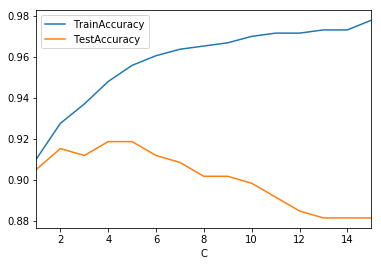

In [11]:
ds_accuracy1_scaled.set_index("C", inplace = False).plot.line()

In [23]:
train_accuracy = []
test_accuracy = []
para_gamma = []
for gamma in range(1, 4):
    svm2_scaled = SVC(gamma = 1.0 / pow(10.0, gamma) , random_state=1234)
    svm2_scaled.fit(ds_train_x_scaled, ds_train_y)
    para_gamma.append(1.0/ pow(10.0, gamma) )
    train_accuracy.append(svm2_scaled.score(ds_train_x_scaled, ds_train_y))
    test_accuracy.append(svm2_scaled.score(ds_test_x_scaled, ds_test_y))

ds_accuracy2_scaled = pd.DataFrame()
ds_accuracy2_scaled["Gamma"] = para_gamma
ds_accuracy2_scaled["TrainAccuracy"] = train_accuracy
ds_accuracy2_scaled["TestAccuracy"] = test_accuracy
ds_accuracy2_scaled.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.100,0.956,0.895
1,0.010,0.907,0.902
2,0.001,0.820,0.814


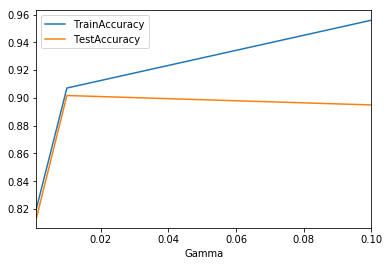

In [24]:
ds_accuracy2_scaled.set_index("Gamma", inplace = False).plot.line()